In [1]:
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install pandas

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from igraph import *
import cairo
import pandas as pd

# 1. Networks in igraph

**igraph** is a collection of network analysis tools with the emphasis on efficiency, portability and ease of use. igraph is open source and free. igraph can be programmed in R, Python, Mathematica and C/C++. Lessons will cover the igraph python package but feel free to investigate on your own the R package. 

To install the package you just need to follow this instructions: https://igraph.org/python/tutorial/0.9.6/install.html


# 1.1 Create networks

We can generate graphs using the graph function of igraph. It receives the following arguments:

* Edges (A vector defining the edges)
* n (The number of vertices in the graph)
* isolates (names of isolate vertices)
* directed (Whether to create a directed graph)
* simplify (whether to simplify the graph)

Let's start with the simplest one: an undirected graph with three edges.
Undirected graphs are for symmetric relationships.

In [3]:
g1 = Graph(edges=[[0,1], [1,2], [2,0]])

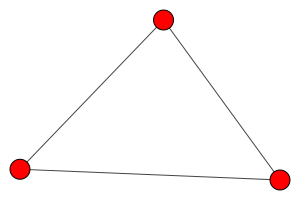

In [4]:
plot(g1,bbox=(300, 200))

You can obtain more information about the graph executing class and executing print(g1). 

The description of an igraph object starts with up to four letters:

1. D or U, for a directed or undirected graph: if either they have symmetrical or asymmetrical relations
2. N for a named graph (where nodes have a name attribute)
3. W for a weighted graph (where edges have a weight attribute): when each connection does not have the same importance
4. B for a bipartite (two-mode) graph (where nodes have a type attribute)

The two numbers that follow (7 5) refer to the number of nodes and edges in the graph. The description also lists node & edge attributes, for example:

* (g/c) - graph-level character attribute
* (v/c) - vertex-level character attribute
* (e/n) - edge-level numeric attribute

In [5]:
print(g1)

IGRAPH U--- 3 3 --
+ edges:
0--1 1--2 0--2


Now, do you think you can create a different graph?

In [6]:
# Create a graph with 7 vertices, one isolated vertix, and directed edges between them
g2 = Graph(directed=True, edges=[[0,1], [1,0], [1,4],[2,5], [6,4], [6,6], [4,3], [2,4], [4,6]], edge_attrs={"weight": [100, 100, 100, 120, 150, 100, 200, 140, 100]},
           n=7, vertex_attrs={"label": ["A", "B", "C", "D", "E", "F", "G"]})

g2.get_adjacency(attribute="weight")

g2.add_vertex(1)


igraph.Vertex(<igraph.Graph object at 0x000001D7DBC1E240>, 7, {'label': None, 'name': 1})

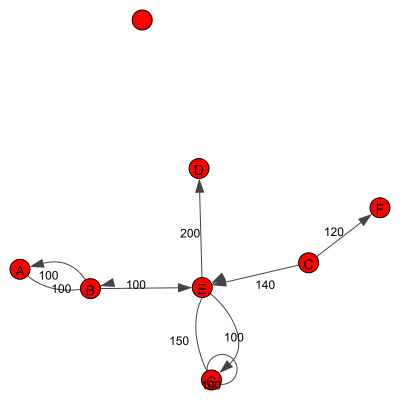

In [7]:
plot(g2,bbox=(400, 400), vertex_label=g2.vs["label"], edge_label=g2.es["weight"])

In [8]:
print(g2)

IGRAPH DNW- 8 9 --
+ attr: label (v), name (v), weight (e)
+ edges (vertex names):
None->None, None->None, None->None, None->None, None->None, None->None,
None->None, None->None, None->None


You can create a graph with a representation of a graph formula.

A graph formula is a simple string representation of a graph. It is very handy for creating small graphs quickly. The string consists of vertex names separated by edge operators. An edge operator is a sequence of dashes (-) that may or may not start with an arrowhead (< at the beginning of the sequence or > at the end of the sequence). The edge operators can be arbitrarily long, i.e., you may use as many dashes to draw them as you like. This makes a total of four different edge operators:

----- makes an undirected edge

<---- makes a directed edge pointing from the vertex on the right hand side of the operator to the vertex on the left hand side ----> is the opposite of <----

<---> creates a mutual directed edge pair between the two vertices

If you only use the undirected edge operator (-----), the graph will be undirected. Otherwise it will be directed. Vertex names used in the formula will be assigned to the name vertex attribute of the graph

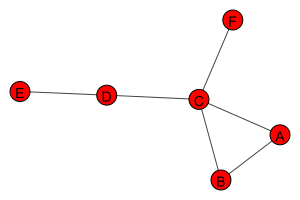

In [9]:
g4 = Graph.Formula('A-B, B-C, C-A, C-D, D-E, C-F')
plot(g4,bbox=(300, 200),vertex_label=g4.vs['name'])

In [ ]:
print(g4)

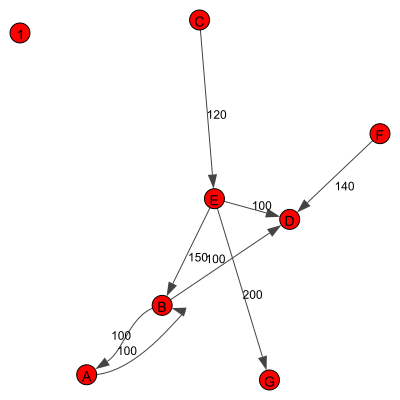

In [10]:
#Discussion board 1.2
# Create a new graph with the formula, plot it and comment the type of the graph, number of nodes, edges...
g3=Graph.Formula('A<->B, B->D, C->E, F->D, G-G, D<-E, E->B, E->G')


weights = [100, 100, 100, 120, 150, 100, 200, 140, 100]

g3.es["weight"] = weights


g3.get_adjacency(attribute="weight")

g3.add_vertex(1)

plot(g3,bbox=(400, 400), vertex_label=g3.vs["name"], edge_label=g3.es["weight"])

In [11]:
print(g3)

IGRAPH DNW- 8 8 --
+ attr: name (v), weight (e)
+ edges (vertex names):
A->B, B->A, B->D, C->E, E->B, E->D, E->G, F->D
